In [82]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
  
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [83]:
#Read the healthcare dataset csv file and load the data into a panda dataframe
#data = pd.read_csv("/Users/shaheen/Downloads/healthcare-dataset-stroke-data.csv")
df = pd.read_csv("//studata10/home/LI/Lis22sr/ManW10/Desktop/healthcare-dataset-stroke-data.csv")

#Drop 'id' from the dataset
df = df.drop('id', axis=1)

#view the top 5 rows of the input dataset
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [84]:
#View the column details of the dataframe
df.info()

#View the min, max, mean of the data
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [85]:
#Identify all the columns with numerical values
numerical_cols = df.columns[df.dtypes!='object']

#Identify the columns with categorical values
categorical_cols = df.columns[df.dtypes=='object']

#View the columns with numerical and categorical values
print(numerical_cols, '\n', categorical_cols)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object') 
 Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [86]:
# Check for duplicate entries based on all columns
duplicate_entries = df[df.duplicated(keep=False)]

# To keep only the first occurrence of each duplicate entry, use the 'keep' parameter
# duplicate_entries = stroke_df[stroke_df.duplicated(keep='first')]

if not duplicate_entries.empty:
    print("Duplicate entries found:")
    print(duplicate_entries)
else:
    print("No duplicate entries found.")

No duplicate entries found.


In [87]:
#Check for null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [88]:
########################## FIND THE MISSING VALUES ########################## 

# Display rows with null values
null_rows = df[df.isnull().any(axis=1)]

# Display the rows with null values
print("\nRows with null values:")
print(null_rows)

# Find the number of records for stroke and Non-Stroke that are having null values
null_rows['stroke'].value_counts()


Rows with null values:
      gender   age  hypertension  heart_disease ever_married      work_type  \
1     Female  61.0             0              0          Yes  Self-employed   
8     Female  59.0             0              0          Yes        Private   
13      Male  78.0             0              1          Yes        Private   
19      Male  57.0             0              1           No       Govt_job   
27      Male  58.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
5039    Male  41.0             0              0           No        Private   
5048    Male  40.0             0              0          Yes        Private   
5093  Female  45.0             1              0          Yes       Govt_job   
5099    Male  40.0             0              0          Yes        Private   
5105  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_gl

0    161
1     40
Name: stroke, dtype: int64

In [89]:
########################## REMOVE THE MISSING VALUES ########################## 

# Remove rows with NaN values
#df_cleaned = df.dropna()

In [94]:
########################## REPLACE THE MISSING VALUES WITH MEAN ########################## 
# Create a new DataFrame with all data from 'stroke_df'
df_cleaned = df.copy()

# Calculate the mean value of the "bmi" column
mean_bmi = df["bmi"].mean()
print('mean bmi:', mean_bmi)

# Replace the missing values in the "bmi" column with the mean value
df_cleaned["bmi"].fillna(mean_bmi, inplace=True)

# Verify that missing values have been replaced
print("\nMissing data after replacement:")
print(df_cleaned.isnull().sum())
print(df_cleaned)

mean bmi: 28.89323691179472

Missing data after replacement:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0         

In [ ]:
df_cleaned.info()

In [95]:
# Find the number of records for stroke and Non-Stroke
original_counts = df_cleaned['stroke'].value_counts().sort_index()

print(original_counts)

0    4861
1     249
Name: stroke, dtype: int64


In [96]:
#Find the total number of records present
len(df_cleaned)

5110

In [97]:
# Calculate the percentage of stroke and non-stroke patients of cleaned data
total_records = len(df_cleaned)
stroke_counts = df_cleaned['stroke'].value_counts()

stroke_percentage = (stroke_counts[1] / total_records) * 100
non_stroke_percentage = (stroke_counts[0] / total_records) * 100

# Display the percentages
print("Percentage of stroke patients:", stroke_percentage)
print("Percentage of non-stroke patients:", non_stroke_percentage)

Percentage of stroke patients: 4.87279843444227
Percentage of non-stroke patients: 95.12720156555773


In [98]:
########################## LABEL Encode the columns that are of object datatype ########################## 
d_list = df_cleaned.select_dtypes(include = ['object']).columns.tolist()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_transformed = df_cleaned.copy() 

for i in d_list:
    le.fit(df_cleaned[i])
    df_transformed[i] = le.transform(df_cleaned[i])
    
print(df_transformed)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          2   
1          0  61.0             0              0             1          3   
2          1  80.0             0              1             1          2   
3          0  49.0             0              0             1          2   
4          0  79.0             1              0             1          3   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          2   
5106       0  81.0             0              0             1          3   
5107       0  35.0             0              0             1          3   
5108       1  51.0             0              0             1          2   
5109       0  44.0             0              0             1          0   

      Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0         

In [99]:
from scipy.stats import chi2_contingency
# Create a contingency table to calculate the chi-square test
contingency_table = pd.crosstab(df_cleaned['stroke'], df_cleaned['gender'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square value:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square value: 0.47258662884530234
P-value: 0.7895490538408245
Degrees of freedom: 2
Expected frequencies table:
[[2.84810841e+03 2.01194031e+03 9.51272016e-01]
 [1.45891585e+02 1.03059687e+02 4.87279843e-02]]


In [100]:
from scipy.stats import pointbiserialr
#correlations = {}
#for column in df_cleaned.columns[:-1]:  # Exclude the last column (dependent variable "stroke")
point_biserial_corr = pointbiserialr(df_transformed['hypertension'], df_transformed['stroke'])
correlations = point_biserial_corr

# Print the correlation coefficients
print("Point-Biserial Correlations:")
print(correlations)

Point-Biserial Correlations:
PointbiserialrResult(correlation=0.1279038234664793, pvalue=4.3675567699764573e-20)


In [101]:
########################## NORMALISE THE FEATURES AGE/BMI/ AVG_GLUCOSE_LEVEL ########################## 

# Normalise the 'age', 'avg_glucose_level' and 'bmi' columns using Min-Max scaling (Normalization)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalised = df_transformed.copy() 
df_normalised[['age','avg_glucose_level', 'bmi']] = scaler.fit_transform(df_transformed[['age', 'avg_glucose_level','bmi']])
print(df_normalised)


      gender       age  hypertension  heart_disease  ever_married  work_type  \
0          1  0.816895             0              1             1          2   
1          0  0.743652             0              0             1          3   
2          1  0.975586             0              1             1          2   
3          0  0.597168             0              0             1          2   
4          0  0.963379             1              0             1          3   
...      ...       ...           ...            ...           ...        ...   
5105       0  0.975586             1              0             1          2   
5106       0  0.987793             0              0             1          3   
5107       0  0.426270             0              0             1          3   
5108       1  0.621582             0              0             1          2   
5109       0  0.536133             0              0             1          0   

      Residence_type  avg_glucose_level

In [102]:
########################## SEPERATE TARGET AND FEATURE VARIABLES ########################## 

X=df_normalised.drop('stroke',axis=1)
y=df_normalised['stroke']


In [103]:
################## OVER n down SAMPLING USING SMOTEENN ########################## 

from imblearn.combine import SMOTEENN
#from imblearn.pipeline import make_pipeline
smote_enn = SMOTEENN(random_state=42)
X_resample, y_resample = smote_enn.fit_resample(X, y)

resampled_counts = y_resample.value_counts().sort_index()
print(resampled_counts)

0    3871
1    4310
Name: stroke, dtype: int64


In [104]:
########################## CALCULATE THE STROKE AND NON-STROKE DATA AND FIND THE PERCENTAGE ########################## 

# Create a new balanced DataFrame
df_balanced = pd.concat([X_resample, y_resample], axis=1)

# Print the value counts to check the balance of the target variable
print(df_balanced["stroke"].value_counts())

# Calculate the percentage of stroke and non-stroke patients of cleaned data
total_records = len(df_balanced)
stroke_counts = df_balanced['stroke'].value_counts()

stroke_percentage = (stroke_counts[1] / total_records) * 100
non_stroke_percentage = (stroke_counts[0] / total_records) * 100

# Display the percentages
print("Percentage of stroke patients:", stroke_percentage)
print("Percentage of non-stroke patients:", non_stroke_percentage)

1    4310
0    3871
Name: stroke, dtype: int64
Percentage of stroke patients: 52.68304608238602
Percentage of non-stroke patients: 47.316953917613986


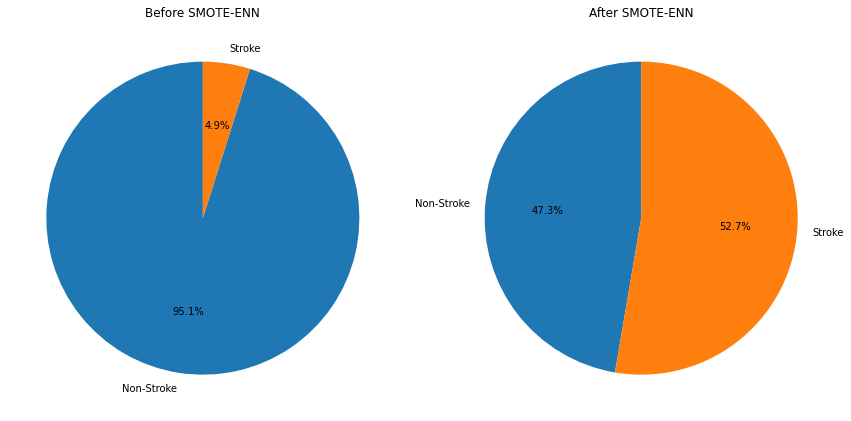

In [121]:
########################## COMPARE DATA BEFORE AND AFTER SMOTEEN ########################## 

# Plotting pie charts comparing the count of stroke and non-stroke before and after applying SMOTE-ENN
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(original_counts, labels=["Non-Stroke", "Stroke"], autopct="%1.1f%%", startangle=90)
plt.title("Before SMOTE-ENN")

plt.subplot(1, 2, 2)
plt.pie(resampled_counts, labels=["Non-Stroke", "Stroke"], autopct="%1.1f%%", startangle=90)
plt.title("After SMOTE-ENN")

plt.tight_layout()
plt.show()

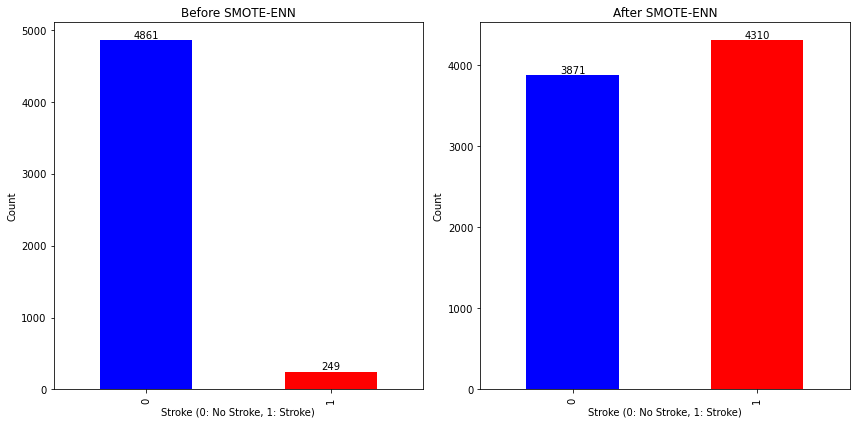

In [123]:
########################## COMPARE DATA BEFORE AND AFTER SMOTEEN ########################## 

# Create bar charts comparing the count of stroke and non-stroke before and after applying SMOTE-ENN
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
original_counts.plot(kind="bar", color=["blue", "red"])
plt.title("Before SMOTE-ENN")
plt.xlabel("Stroke (0: No Stroke, 1: Stroke)")
plt.ylabel("Count")
for i, v in enumerate(original_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.subplot(1, 2, 2)
resampled_counts.plot(kind="bar", color=["blue", "red"])
plt.title("After SMOTE-ENN")
plt.xlabel("Stroke (0: No Stroke, 1: Stroke)")
plt.ylabel("Count")
for i, v in enumerate(resampled_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

                     gender       age  hypertension  heart_disease  \
gender             1.000000 -0.032937     -0.049507       0.120231   
age               -0.032937  1.000000      0.264215       0.210747   
hypertension      -0.049507  0.264215      1.000000       0.003709   
heart_disease      0.120231  0.210747      0.003709       1.000000   
ever_married       0.020674  0.572450      0.059078       0.111384   
work_type          0.080643 -0.279041      0.031365      -0.046727   
Residence_type    -0.017441 -0.012280     -0.025169       0.005447   
avg_glucose_level  0.101573  0.289656      0.176514       0.253959   
bmi                0.015810  0.236692      0.106270       0.053550   
smoking_status    -0.057071  0.170672      0.128913       0.099017   
stroke            -0.019547  0.703853      0.207298       0.163259   

                   ever_married  work_type  Residence_type  avg_glucose_level  \
gender                 0.020674   0.080643       -0.017441           0.101573 

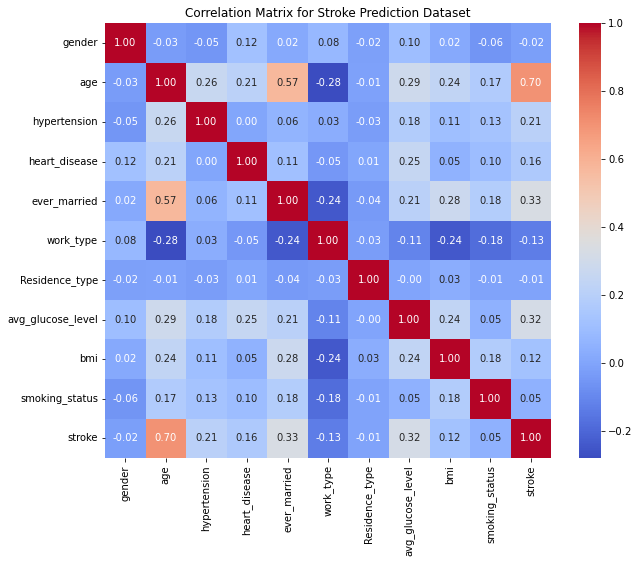

In [107]:
########################## COMPUTE CORRELATION MATRIX ########################## 
# Compute the correlation matrix
correlation_matrix = df_balanced.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Stroke Prediction Dataset")
plt.show()

In [108]:
########################## SPLITTING THE DATASET INTO TRAIN AND TEST with STRATIFIED SAMPLING ########################## 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.30, stratify=y_resample, random_state = 42)

# Count the number of train and test dataset
print("X_train count:", len(X_train))
print("X_test count:", len(X_test))

X_train count: 5726
X_test count: 2455


In [109]:
#################### LOGISTIC REGRESSION MODEL ########################## 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score

LRmodel=LogisticRegression()

# Define the metrics you want to calculate
scoring = {
    'accuracy': 'accuracy',
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
}

# Perform cross-validation using k-fold cross-validation (k=5 in this example)
k_folds = 5
cv_results = cross_validate(LRmodel, X_train, y_train, cv=k_folds, scoring=scoring )

# Print the cross-validation scores
print("Cross-validation results:")
print(f"Average accuracy: {np.mean(cv_results['test_accuracy'])}")
print(f"Average F1 score: {np.mean(cv_results['test_f1'])}")
print(f"Average precision: {np.mean(cv_results['test_precision'])}")
print(f"Average recall: {np.mean(cv_results['test_recall'])}")
print(f"Average std deviation: {np.mean(cv_results['test_accuracy'])}")

# Now, you can fit the model to the entire training set and evaluate it on the test set
LRmodel.fit(X_train, y_train)
print("Accuracy of the model with traing dataset: ", LRmodel.score(X_train,y_train))

y_pred=LRmodel.predict(X_test)
test_accuracy = LRmodel.score(X_test, y_test)
print(f"Test set accuracy: {test_accuracy}")

Cross-validation results:
Average accuracy: 0.8456137543153707
Average F1 score: 0.8584752871130986
Average precision: 0.8300372207058299
Average recall: 0.8889580793603725
Average std deviation: 0.8456137543153707
Accuracy of the model with traing dataset:  0.846489696122948
Test set accuracy: 0.8545824847250509


In [110]:
####################### COEFFICIENTS ########################## 

# Retrieve the coefficients or weights of the features
coefficients = LRmodel.coef_[0]  # Assuming only one target class, access the coefficients of the first class

# Create a DataFrame to store the feature names and their corresponding coefficients
feature_coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the features based on the absolute magnitude of their coefficients
feature_coefficients['Abs_Coefficient'] = abs(feature_coefficients['Coefficient'])
sorted_features = feature_coefficients.sort_values('Abs_Coefficient', ascending=False)

# Print the features and their coefficients in descending order
print("Sorted Featers:\n ", sorted_features)

Sorted Featers:
               Feature  Coefficient  Abs_Coefficient
1                age     8.922116         8.922116
7  avg_glucose_level     1.749037         1.749037
8                bmi     0.490517         0.490517
3      heart_disease    -0.290880         0.290880
4       ever_married    -0.247479         0.247479
0             gender    -0.210657         0.210657
9     smoking_status    -0.036531         0.036531
6     Residence_type    -0.032927         0.032927
2       hypertension    -0.029061         0.029061
5          work_type    -0.011703         0.011703


Confusion matrix:
  [[ 943  219]
 [ 138 1155]]


Text(0.5, 257.44, 'Predicted label')

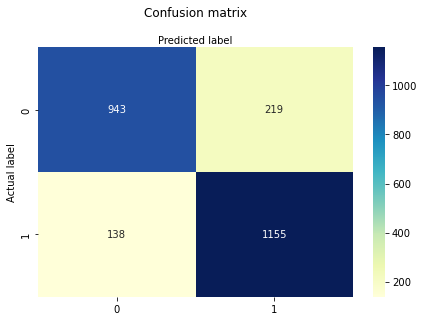

In [111]:
########################## CONFUSION MATRIX ##########################

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n ", cnf_matrix)

########################## Visualisation of confusion matrix ########################## 

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label');

In [112]:
############## Compute F1-score and MCC ###############
from sklearn.metrics import classification_report, f1_score, matthews_corrcoef
# Compute F1-score
f1 = f1_score(y_test, y_pred)

# Compute Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)

# Print the F1-score and MCC
print("F1-score: ", f1)
print("MCC: ", mcc)

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

F1-score:  0.8661417322834646
MCC:  0.7088658329712016
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1162
           1       0.84      0.89      0.87      1293

    accuracy                           0.85      2455
   macro avg       0.86      0.85      0.85      2455
weighted avg       0.86      0.85      0.85      2455



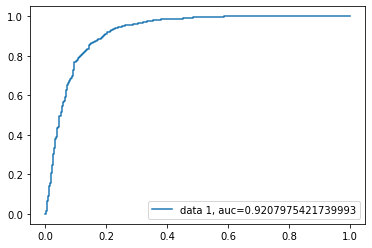

In [113]:
########################## ROC curve ########################## 

y_pred_proba = LRmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [114]:
#################### RANDOM FOREST MODEL ########################## 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score

RFmodel = RandomForestClassifier(random_state=42)

# Define the metrics you want to calculate
scoring = {
    'accuracy': 'accuracy',
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
}

# Perform cross-validation using k-fold cross-validation (k=5 in this example)
k_folds = 5
cv_results = cross_validate(RFmodel, X_train, y_train, cv=k_folds, scoring=scoring )

# Print the cross-validation scores
print("Cross-validation results:")
print(f"Average accuracy: {np.mean(cv_results['test_accuracy'])}")
print(f"Average F1 score: {np.mean(cv_results['test_f1'])}")
print(f"Average precision: {np.mean(cv_results['test_precision'])}")
print(f"Average recall: {np.mean(cv_results['test_recall'])}")
print(f"Average std deviation: {np.mean(cv_results['test_accuracy'])}")

# Now, you can fit the model to the entire training set and evaluate it on the test set
RFmodel.fit(X_train, y_train)
print("Accuracy of the model with traing dataset: ", RFmodel.score(X_train,y_train))

y_pred=RFmodel.predict(X_test)
test_accuracy = RFmodel.score(X_test, y_test)
print(f"Test set accuracy: {test_accuracy}")

Cross-validation results:
Average accuracy: 0.9416706676726339
Average F1 score: 0.9461729000488617
Average precision: 0.9209599124047088
Average recall: 0.9728213238443544
Average std deviation: 0.9416706676726339
Accuracy of the model with traing dataset:  1.0
Test set accuracy: 0.9568228105906313


Confusion matrix:
  [[1086   76]
 [  30 1263]]


Text(0.5, 257.44, 'Predicted label')

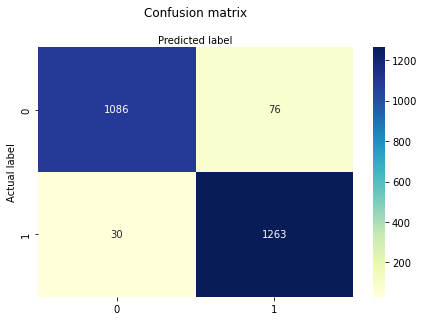

In [115]:
########################## CONFUSION MATRIX ##########################

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n ", cnf_matrix)

########################## Visualisation of confusion matrix ########################## 

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label');

In [116]:
############## Compute F1-score and MCC ###############
from sklearn.metrics import classification_report, f1_score, matthews_corrcoef
# Compute F1-score
f1 = f1_score(y_test, y_pred)

# Compute Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)

# Print the F1-score and MCC
print("F1-score: ", f1)
print("MCC: ", mcc)

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

F1-score:  0.9597264437689969
MCC:  0.9138732136518144
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      1162
           1       0.94      0.98      0.96      1293

    accuracy                           0.96      2455
   macro avg       0.96      0.96      0.96      2455
weighted avg       0.96      0.96      0.96      2455



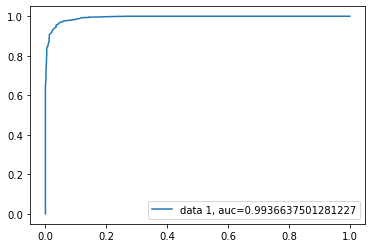

In [117]:
########################## ROC curve ########################## 

y_pred_proba = RFmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [118]:
#pip install tensorflow

In [119]:
########################### artificial neural network (ANN)  #########################
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Step 5: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the model on the training data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Step 7: Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/10
144/144 [==============================] - 1s 3ms/step - loss: 0.5748 - accuracy: 0.7157 - val_loss: 0.4658 - val_accuracy: 0.8037
Epoch 2/10
144/144 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.8201 - val_loss: 0.3930 - val_accuracy: 0.8316
Epoch 3/10
144/144 [==============================] - 0s 1ms/step - loss: 0.3710 - accuracy: 0.8459 - val_loss: 0.3557 - val_accuracy: 0.8508
Epoch 4/10
144/144 [==============================] - 0s 1ms/step - loss: 0.3471 - accuracy: 0.8557 - val_loss: 0.3517 - val_accuracy: 0.8438
Epoch 5/10
144/144 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8576 - val_loss: 0.3367 - val_accuracy: 0.8421
Epoch 6/10
144/144 [==============================] - 0s 1ms/step - loss: 0.3307 - accuracy: 0.8622 - val_loss: 0.3364 - val_accuracy: 0.8604
Epoch 7/10
144/144 [==============================] - 0s 1ms/step - loss: 0.3251 - accuracy: 0.8618 - val_loss: 0.3362 - val_accuracy: 0.8682
Epoch 

In [124]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
# Initialize the ANN classifier
ann_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Define the evaluation metrics for cross-validation
scoring = ['accuracy', 'precision', 'recall','f1']

# Perform k-fold cross-validation (let's assume k=5)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and store the results
accuracy_scores = cross_val_score(ann_classifier, X_train, y_train, cv=k_fold, scoring='accuracy')
precision_scores = cross_val_score(ann_classifier, X_train, y_train, cv=k_fold, scoring='precision')
f1_scores = cross_val_score(ann_classifier, X_train, y_train, cv=k_fold, scoring='f1')

# Calculate the average and standard deviation of the evaluation metrics
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_f1 = np.mean(f1_scores)

std_accuracy = np.std(accuracy_scores)
std_precision = np.std(precision_scores)
std_f1 = np.std(f1_scores)

# Print the results
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average F1 Score:", avg_f1)

print("Standard Deviation of Accuracy:", std_accuracy)
print("Standard Deviation of Precision:", std_precision)
print("Standard Deviation of F1 Score:", std_f1)

Average Accuracy: 0.9276979354809208
Average Precision: 0.9107383155171558
Average F1 Score: 0.933041473922426
Standard Deviation of Accuracy: 0.007170709336198276
Standard Deviation of Precision: 0.01626856390466523
Standard Deviation of F1 Score: 0.0065562637435745185


Cross-validation results of Logistic Regression:
Average accuracy: 0.8461376193633446
Average F1 score: 0.8585764902422579
Average precision: 0.8322544243058839
Average recall: 0.8866385511734922
Average std deviation: 0.8461376193633446
Cross-validation results of Random forest:
Average accuracy: 0.9425432680216741
Average F1 score: 0.9470352455446674
Average precision: 0.9208192981776591
Average recall: 0.97480972620342
Average std deviation: 0.9425432680216741
Cross-validation results of ANN:
Average accuracy: 0.9343365570009983
Average F1 score: 0.9393296298756623
Average precision: 0.915966205175337
Average recall: 0.9641999714452023
Average std deviation: 0.9343365570009983
Average std deviation: 0.9343365570009983
Mean Accuracies: {'Logistic Regression': 0.8461376193633446, 'Random Forest': 0.9425432680216741, 'Artificial Neural Network': 0.9343365570009983}
Test Accuracies: {'Logistic Regression': 0.8545824847250509, 'Random Forest': 0.9568228105906313, 'Artificial Neural Netwo

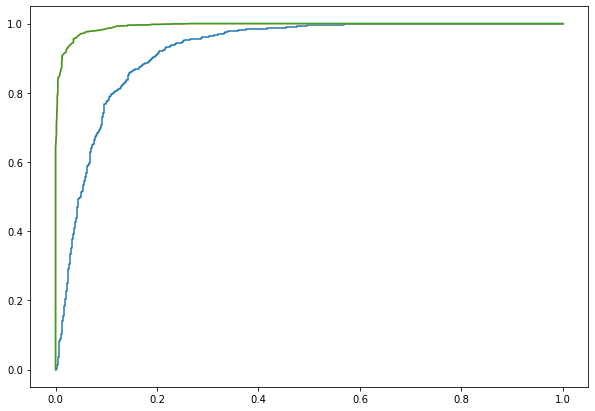

In [142]:
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef, roc_auc_score, roc_curve, auc

# Define the evaluation metrics for cross-validation
scoring = ['accuracy', 'precision', 'recall','f1']

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}
logreg_grid_search = GridSearchCV(logreg_model, logreg_params, cv=5)
logreg_grid_search.fit(X_train, y_train)
logreg_best_model = logreg_grid_search.best_estimator_
logreg_scores = cross_validate(logreg_best_model, X_train, y_train, cv=5, scoring= scoring)

# Print the cross-validation scores
print("Cross-validation results of Logistic Regression:")
print(f"Average accuracy: {np.mean(logreg_scores['test_accuracy'])}")
print(f"Average F1 score: {np.mean(logreg_scores['test_f1'])}")
print(f"Average precision: {np.mean(logreg_scores['test_precision'])}")
print(f"Average recall: {np.mean(logreg_scores['test_recall'])}")
print(f"Average std deviation: {np.mean(logreg_scores['test_accuracy'])}")


# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]
}
rf_grid_search = GridSearchCV(rf_model, rf_params, cv=5)
rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_
rf_scores = cross_validate(rf_best_model, X_train, y_train, cv=5, scoring= scoring)

# Print the cross-validation scores
print("Cross-validation results of Random forest:")
print(f"Average accuracy: {np.mean(rf_scores['test_accuracy'])}")
print(f"Average F1 score: {np.mean(rf_scores['test_f1'])}")
print(f"Average precision: {np.mean(rf_scores['test_precision'])}")
print(f"Average recall: {np.mean(rf_scores['test_recall'])}")
print(f"Average std deviation: {np.mean(rf_scores['test_accuracy'])}")


# Artificial Neural Network (ANN)
ann_model = MLPClassifier(random_state=42)
ann_params = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)],
    'activation': ['relu', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01]
}
ann_grid_search = GridSearchCV(ann_model, ann_params, cv=5)
ann_grid_search.fit(X_train, y_train)
ann_best_model = ann_grid_search.best_estimator_
ann_scores = cross_validate(ann_best_model, X_train, y_train, cv=5, scoring= scoring)

# Print the cross-validation scores
print("Cross-validation results of ANN:")
print(f"Average accuracy: {np.mean(ann_scores['test_accuracy'])}")
print(f"Average F1 score: {np.mean(ann_scores['test_f1'])}")
print(f"Average precision: {np.mean(ann_scores['test_precision'])}")
print(f"Average recall: {np.mean(ann_scores['test_recall'])}")
print(f"Average std deviation: {np.mean(ann_scores['test_accuracy'])}")
print(f"Average std deviation: {np.mean(ann_scores['test_accuracy'])}")

# Fit the models on the entire training data
logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
ann_model.fit(X_train, y_train)

# Predict on the test data
logreg_preds = logreg_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
ann_preds = ann_model.predict(X_test)

# Calculate scores for test data
logreg_accuracy = accuracy_score(y_test, logreg_preds)
logreg_f1 = f1_score(y_test, logreg_preds)
logreg_precision = precision_score(y_test, logreg_preds)
logreg_recall = recall_score(y_test, logreg_preds)
logreg_mcc = matthews_corrcoef(y_test, logreg_preds)
logreg_probs = logreg_model.predict_proba(X_test)[:, 1]
logreg_auc_roc = roc_auc_score(y_test, logreg_probs)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_probs)


rf_accuracy = accuracy_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)
rf_mcc = matthews_corrcoef(y_test, rf_preds)
rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_auc_roc = roc_auc_score(y_test, rf_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)


ann_accuracy = accuracy_score(y_test, ann_preds)
ann_f1 = f1_score(y_test, ann_preds)
ann_precision = precision_score(y_test, ann_preds)
ann_recall = recall_score(y_test, ann_preds)
ann_mcc = matthews_corrcoef(y_test, ann_preds)
ann_probs = ann_model.predict_proba(X_test)[:, 1]
ann_auc_roc = roc_auc_score(y_test, ann_probs)
fpr_ann, tpr_ann, _ = roc_curve(y_test, ann_probs)

# Compare and find out which model performs the best
models = ['Logistic Regression', 'Random Forest', 'Artificial Neural Network']
mean_accuracies = [np.mean(logreg_scores['test_accuracy']), np.mean(rf_scores['test_accuracy']), np.mean(ann_scores['test_accuracy'])]
test_accuracies = [logreg_accuracy, rf_accuracy, ann_accuracy]
test_f1_scores = [logreg_f1, rf_f1, ann_f1]
test_precisions = [logreg_precision, rf_precision, ann_precision]
test_recalls = [logreg_recall, rf_recall, ann_recall]
test_mcc_scores = [logreg_mcc, rf_mcc, ann_mcc]
test_auc_scores = [logreg_auc_roc, rf_auc_roc, ann_auc_roc]

best_model_idx = test_f1_scores.index(max(test_f1_scores))
best_model = models[best_model_idx]

print("Mean Accuracies:", dict(zip(models, mean_accuracies)))
print("Test Accuracies:", dict(zip(models, test_accuracies)))
print("Test Recalls:", dict(zip(models, test_recalls)))
print("Test Precisions:", dict(zip(models, test_precisions)))
print("Test F1 Scores:", dict(zip(models, test_f1_scores)))
print("Test MCC Scores:", dict(zip(models, test_mcc_scores)))
print("Test AUC Scores:", dict(zip(models, test_auc_scores)))

print(f"\nThe best-performing model is: {best_model}")

# Plot AUC-ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (AUC = {:.2f})'.format(logreg_auc_roc))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(rf_auc_roc))
plt.plot(fpr_rf, tpr_rf, label='ANN (AUC = {:.2f})'.format(ann_auc_roc))

In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef, roc_auc_score, roc_curve, auc

# Assuming you have a DataFrame named 'stroke_df' with features and the 'stroke' target variable
# Replace the following line with how you obtain your DataFrame
# stroke_df = pd.read_csv("your_stroke_data.csv")

# Define the evaluation metrics for cross-validation
scoring = ['accuracy', 'precision', 'recall','f1']

# Define the hyperparameters to be tuned
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg', 'sag'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced'],
    'random_state': [42]
}

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, scoring= scoring)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding mean cross-validation score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best hyperparameters on the full training set
best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = best_model.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Best Cross-validation Accuracy:", best_score)
print("Test Accuracy with Best Hyperparameters:", accuracy)

Best Hyperparameters: {'C': 0.01, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'}
Best Cross-validation Accuracy: 0.8473604792062005
Test Accuracy with Best Hyperparameters: 0.8582484725050916


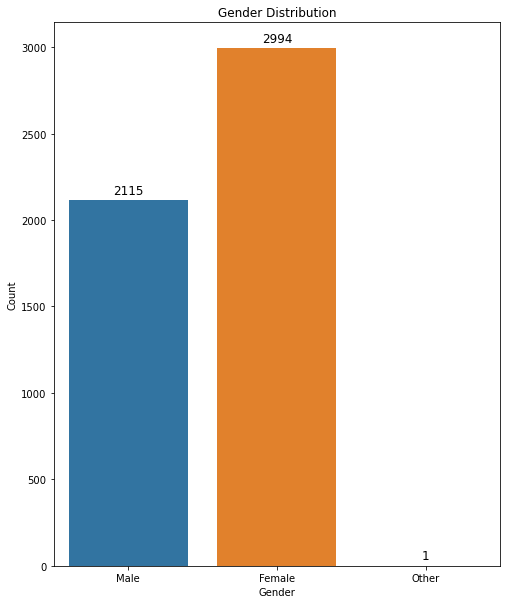

In [176]:
# Visualize gender distribution using a bar plot
plt.figure(figsize=(8, 10))
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
# Add label counts to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                       textcoords='offset points')
plt.show()

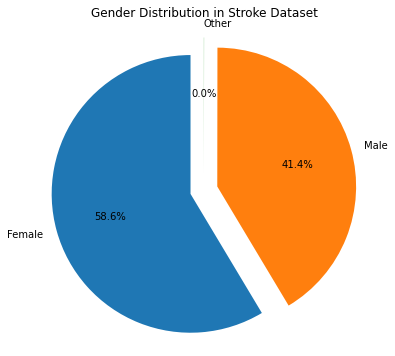

In [201]:
# Count the number of males and females in the stroke dataset
gender_counts = df['gender'].value_counts()
explode = (0.1, 0.1, 0.1)

# Plot the pie chart for gender distribution
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index,explode=explode, autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution in Stroke Dataset")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

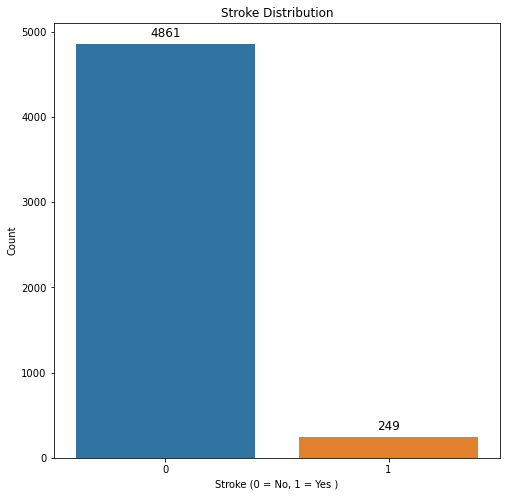

In [185]:
# Visualize stroke distribution using a bar plot
plt.figure(figsize=(8, 8))
sns.countplot(x='stroke', data=df)
plt.title("Stroke Distribution")
plt.xlabel("Stroke (0 = No, 1 = Yes )")
plt.ylabel("Count")
# Add label counts to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                       textcoords='offset points')
plt.show()

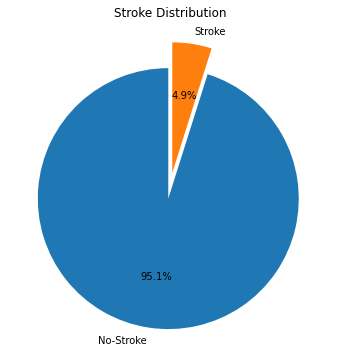

In [207]:
# Count the number of males and females in the stroke dataset
stroke_counts = df['stroke'].value_counts()
explode = (0.1, 0.1)

# Plot the pie chart for gender distribution
plt.figure(figsize=(6, 6))
plt.pie(stroke_counts, labels=['No-Stroke', 'Stroke'],explode=explode, autopct='%1.1f%%', startangle=90)
plt.title("Stroke Distribution")
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

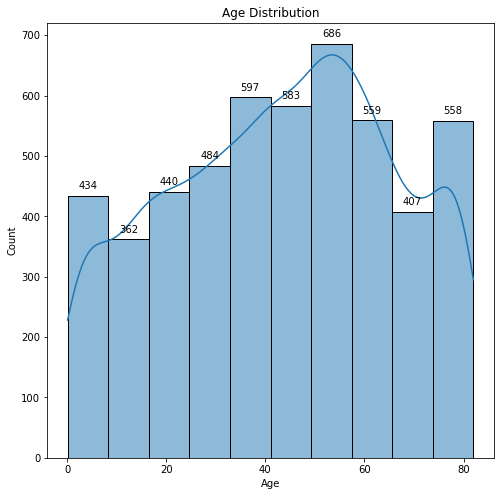

In [195]:
# Visualize age distribution using a histogram
plt.figure(figsize=(8, 8))
sns.histplot(df['age'], bins=10, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
# Add count labels to the histogram bars
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                       textcoords='offset points')
plt.show()

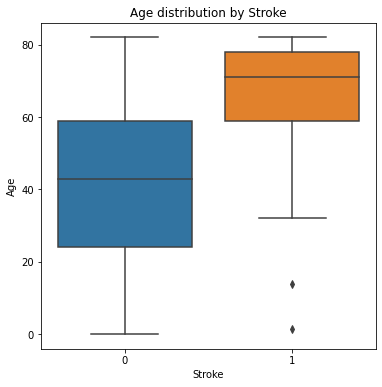

In [189]:
# Plot box plot for gender with stroke
plt.figure(figsize=(6, 6))
sns.boxplot(y='age', x='stroke', data=df)
plt.title("Age distribution by Stroke")
plt.xlabel("Stroke")
plt.ylabel("Age")
#plt.legend(title='Stroke', labels=['No', 'Yes'])
plt.show()

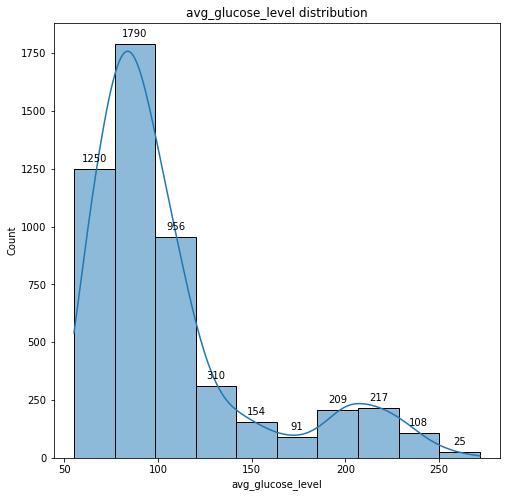

In [194]:
# Visualize avg_glucose_level distribution using a histogram
plt.figure(figsize=(8, 8))
sns.histplot(df['avg_glucose_level'], bins=10, kde=True)
plt.title("avg_glucose_level distribution")
plt.xlabel("avg_glucose_level")
plt.ylabel("Count")
# Add count labels to the histogram bars
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                       textcoords='offset points')
plt.show()

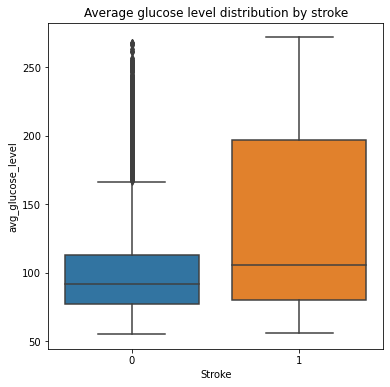

In [188]:
# Plot box plot for gender with stroke
plt.figure(figsize=(6, 6))
sns.boxplot(y='avg_glucose_level', x='stroke',  data=df)
plt.title("Average glucose level distribution by stroke")
plt.xlabel("Stroke")
plt.ylabel("avg_glucose_level")
#plt.legend(title='Stroke', labels=['No', 'Yes'])
plt.show()

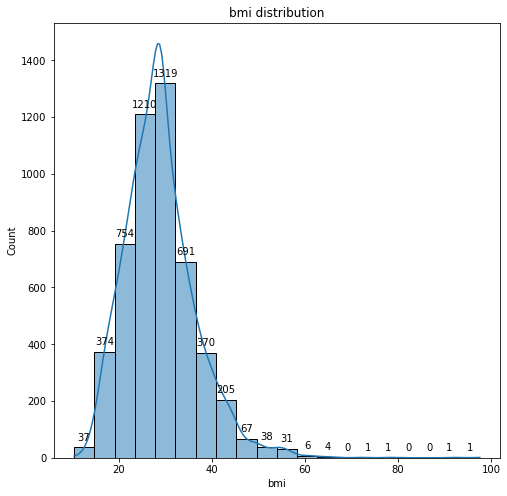

In [197]:
# Visualize bmi distribution using a histogram
plt.figure(figsize=(8, 8))
sns.histplot(df['bmi'], bins=20, kde=True)
plt.title("bmi distribution")
plt.xlabel("bmi")
plt.ylabel("Count")
# Add count labels to the histogram bars
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                       textcoords='offset points')
plt.show()

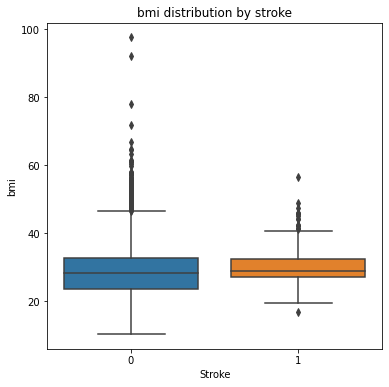

In [199]:
# Plot box plot for gender with stroke
plt.figure(figsize=(6, 6))
sns.boxplot(y='bmi', x='stroke',  data=df)
plt.title("bmi distribution by stroke")
plt.xlabel("Stroke")
plt.ylabel("bmi")
#plt.legend(title='Stroke', labels=['No', 'Yes'])
plt.show()

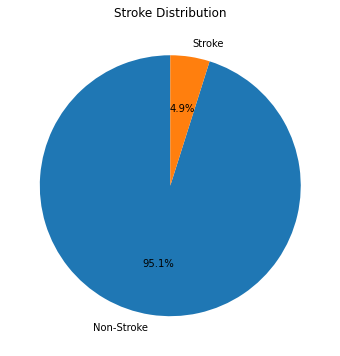

In [173]:
# Count the number of males and females in the stroke dataset
stroke_counts = df['stroke'].value_counts()

# Plot the pie chart for gender distribution
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=["Non-Stroke", "Stroke"], autopct='%1.1f%%', startangle=90)
plt.title("Stroke Distribution")
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()